# Preprocessing İşlemi

In [4]:
import os
import librosa
import matplotlib.pyplot as pyplot
import scipy
import numpy as np
import math
import json

In [5]:
path_prefix = "/home/efectn/python-music-classification"
path = os.path.join(path_prefix, "dataset/genres_original")
for genre in os.listdir(path):
    track_count = len(os.listdir(os.path.join(path, genre)))
    print("Tür: {}, Parça Adedi: {}".format(genre, track_count))

Tür: blues, Parça Adedi: 100
Tür: classical, Parça Adedi: 100
Tür: country, Parça Adedi: 100
Tür: disco, Parça Adedi: 100
Tür: hiphop, Parça Adedi: 100
Tür: jazz, Parça Adedi: 100
Tür: metal, Parça Adedi: 100
Tür: pop, Parça Adedi: 100
Tür: reggae, Parça Adedi: 100
Tür: rock, Parça Adedi: 100


## Metal ve Klasik Parçalar için Dalga Formu Grafiği Karşılaştırması

In [29]:
def waveform_plot(audio_ex, fs):
    pyplot.figure(figsize = (12, 6))
    librosa.display.waveshow(audio_ex, sr=fs)
    pyplot.xlabel("Zaman (saniye)")
    pyplot.ylabel("Genlik")

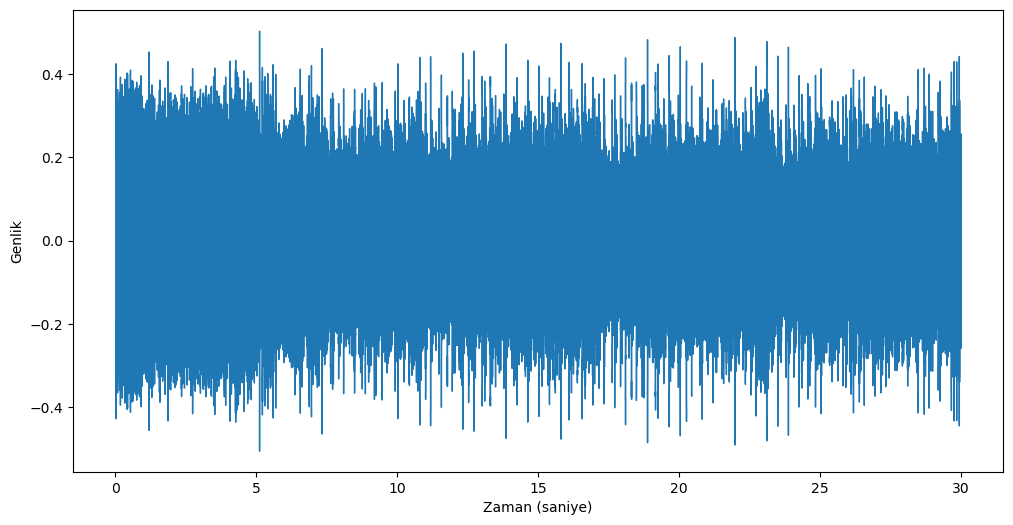

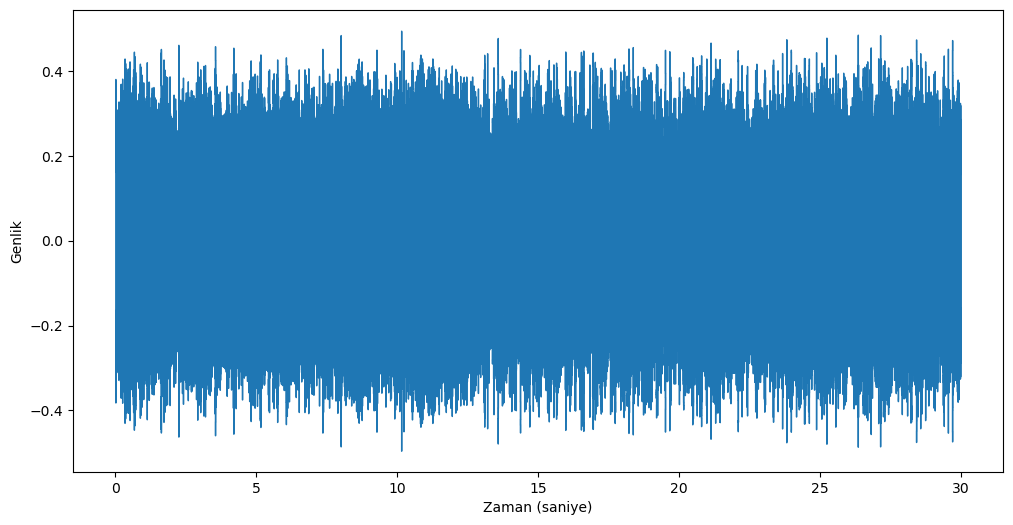

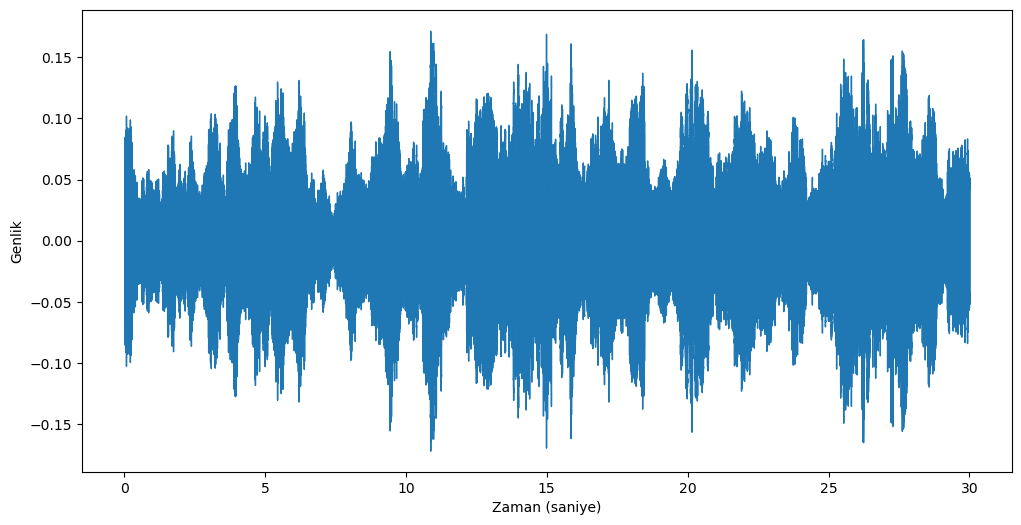

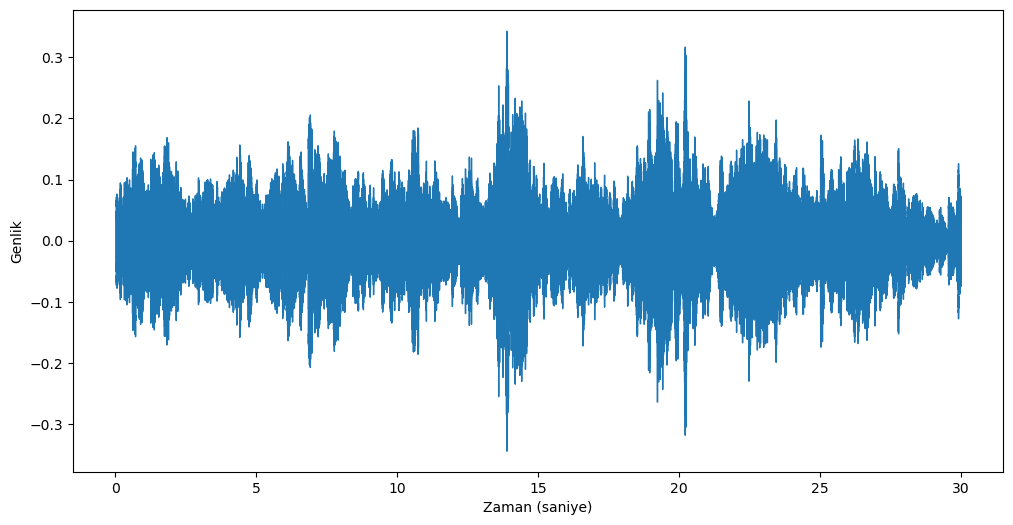

In [32]:
sample_track = os.path.join(path, "metal", "metal.00001.wav")
audio_ex, fs = librosa.load(sample_track)
waveform_plot(audio_ex, fs)

sample_track = os.path.join(path, "metal", "metal.00000.wav")
audio_ex, fs = librosa.load(sample_track)
waveform_plot(audio_ex, fs)

sample_track = os.path.join(path, "classical", "classical.00001.wav")
audio_ex, fs = librosa.load(sample_track)
waveform_plot(audio_ex, fs)

sample_track = os.path.join(path, "classical", "classical.00000.wav")
audio_ex, fs = librosa.load(sample_track)
waveform_plot(audio_ex, fs)


In [ ]:
## Metal ve Klasik Parçalar için Frekans Spekturumu Karşılaştırması

In [51]:
def calc_spec_db(audio):
    spec = scipy.fft.fft(x=audio)
    return 20*np.log10(np.abs(spec))
        
def freq_spectrum_plot(audio_ex, fs):
    spec_db = calc_spec_db(audio_ex)
    f_axis = np.linspace(0, fs, len(spec_db))
    
    f_axis = f_axis[:int(len(spec_db)/2)]
    spec_db = spec_db[:int(len(spec_db)/2)]
    
    pyplot.figure(figsize = (12, 6))
    pyplot.plot(f_axis, spec_db, alpha=1.0)
    pyplot.xscale('log')
    pyplot.xlim(1, fs/2)
    pyplot.xlabel('Frekans (Hz)')
    pyplot.ylabel('Şiddet (dB)')
    pyplot.xticks([1, 2, 4, 8, 16, 31, 63, 125, 250,500,1000,2000,5000,10000], 
                ["1", "2", "4", "8", "16", "31", "63", "125", "250", "500", "1K", "2K", "5K", "10K"])


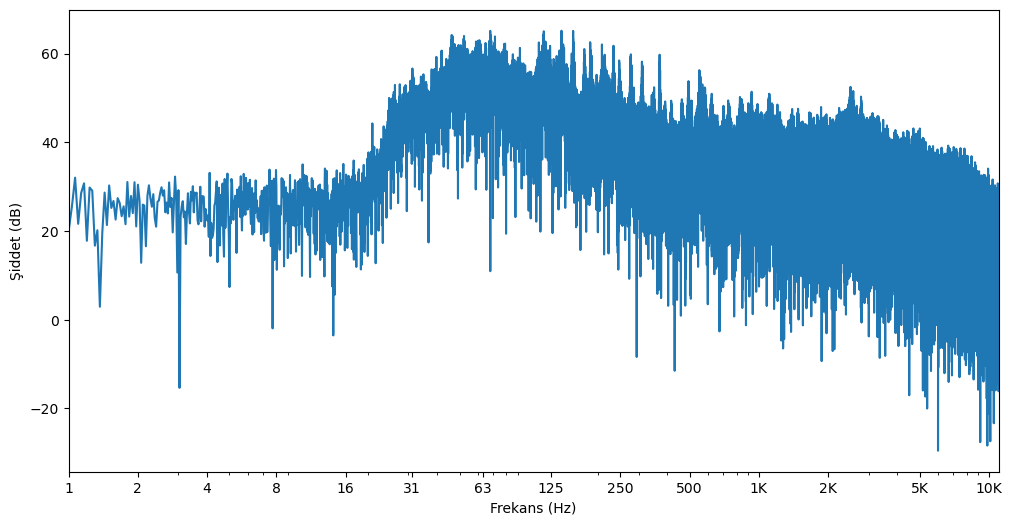

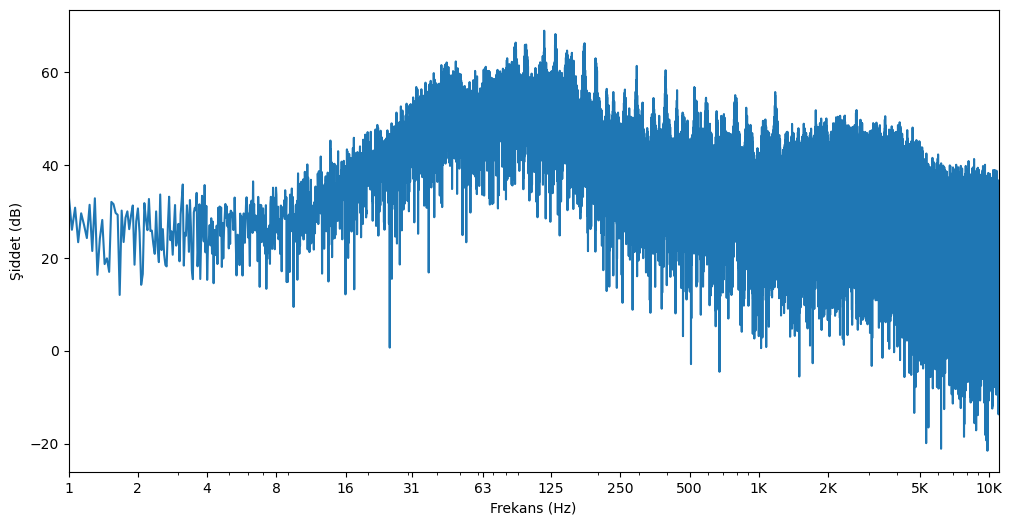

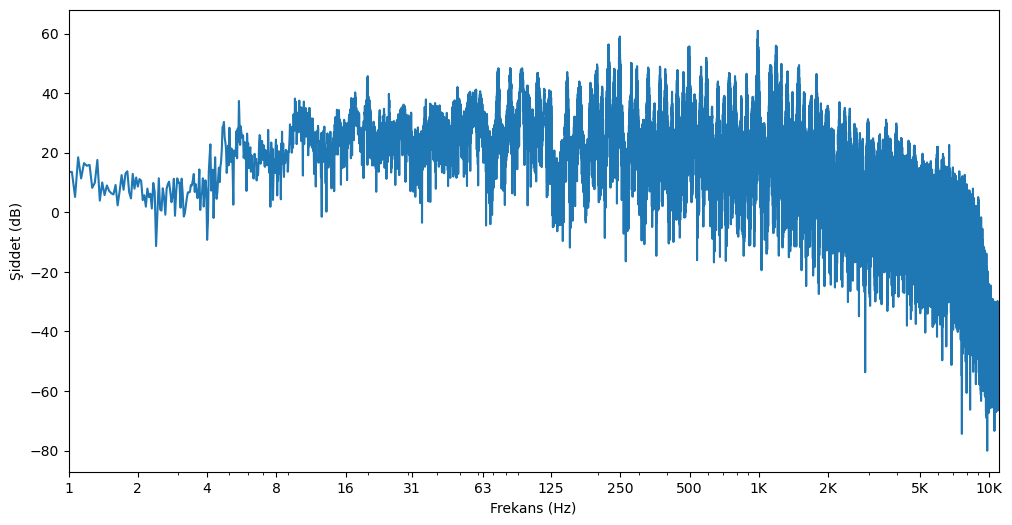

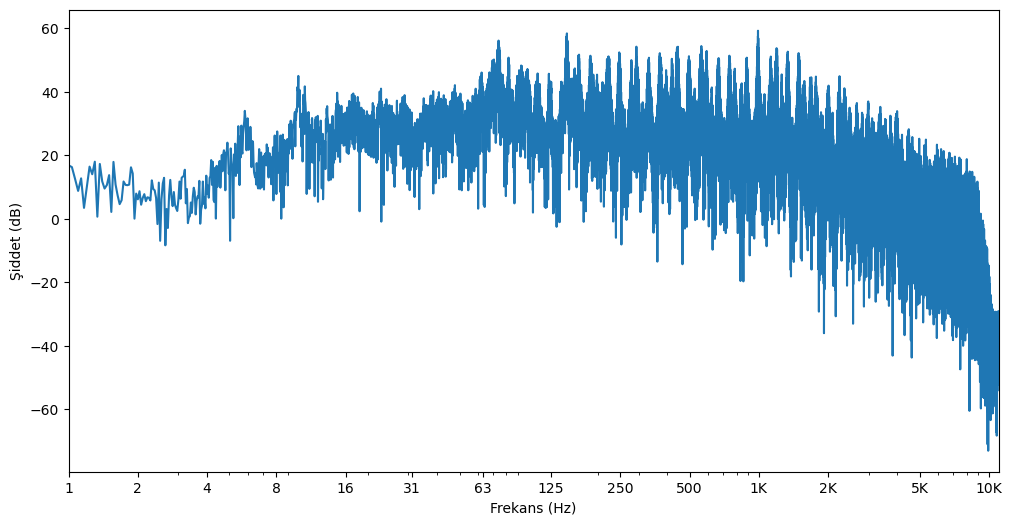

In [53]:
sample_track = os.path.join(path, "metal", "metal.00001.wav")
audio_ex, fs = librosa.load(sample_track)
freq_spectrum_plot(audio_ex, fs)

sample_track = os.path.join(path, "metal", "metal.00000.wav")
audio_ex, fs = librosa.load(sample_track)
freq_spectrum_plot(audio_ex, fs)

sample_track = os.path.join(path, "classical", "classical.00001.wav")
audio_ex, fs = librosa.load(sample_track)
freq_spectrum_plot(audio_ex, fs)

sample_track = os.path.join(path, "classical", "classical.00000.wav")
audio_ex, fs = librosa.load(sample_track)
freq_spectrum_plot(audio_ex, fs)

## Ses Spektogramı

In [65]:
def calc_stft(audio, n_fft=2048, hop_length=512):
    stft = np.abs(librosa.stft(y=audio, n_fft=n_fft, hop_length=hop_length))
    
    return librosa.amplitude_to_db(stft, ref=np.max)

def plot_spectrogram(audio, fs, n_fft=2048, hop_length=512, fig_size=(12,6)):
    stft_db = calc_stft(audio, n_fft=n_fft, hop_length=hop_length)
    
    pyplot.figure(figsize=fig_size)
    librosa.display.specshow(data=stft_db, sr=fs, x_axis='time', y_axis='log', cmap='viridis')

    pyplot.title('Spektogram')
    pyplot.colorbar(format='%+02.0f dB')

    pyplot.tight_layout()
    
def calc_mel_spec(audio, fs, n_mfccs=128, n_fft=2048, hop_length=512):
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=fs, n_mels=n_mfccs, n_fft=n_fft, hop_length=hop_length)
    return librosa.amplitude_to_db(mel_spec, ref=np.max)
    
    
def plot_mel_spectrogram(audio, fs, n_mfccs=128, n_fft=2048, hop_length=512, fig_size=(12,6)):
    mel_spec_db = calc_mel_spec(audio, fs, n_mfccs=n_mfccs, n_fft=n_fft, hop_length=hop_length)
    
    pyplot.figure(figsize=fig_size)
    librosa.display.specshow(data=mel_spec_db, sr=fs, x_axis='time', y_axis='mel', cmap='viridis')

    pyplot.title('Mel Spektogram')
    pyplot.colorbar(format='%+02.0f dB')
    pyplot.tight_layout()



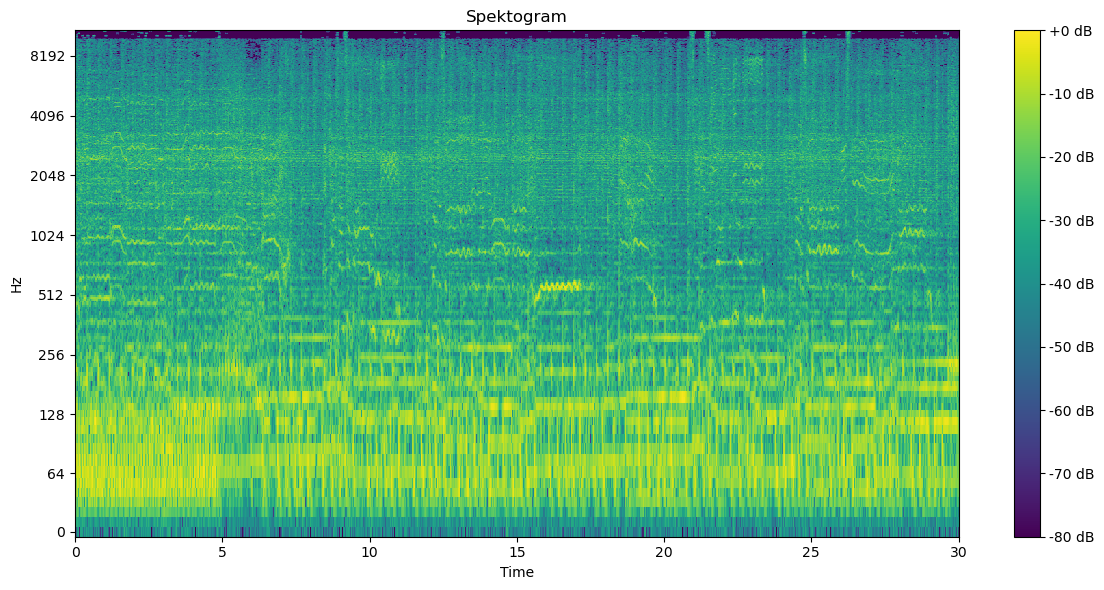

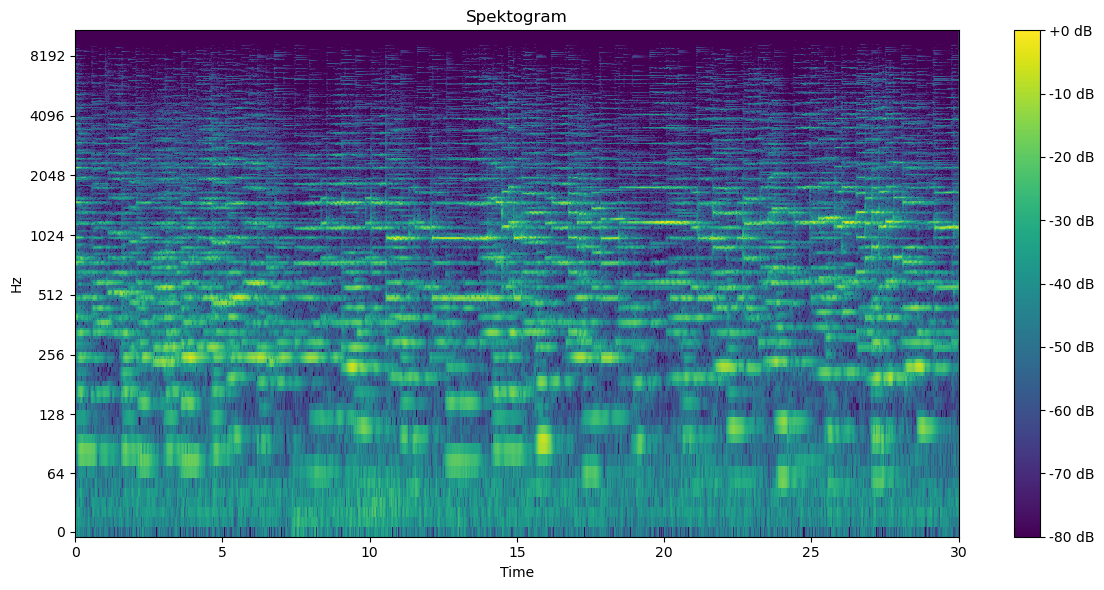

In [59]:
sample_track = os.path.join(path, "metal", "metal.00001.wav")
audio_ex, fs = librosa.load(sample_track)
plot_spectrogram(audio_ex, fs)

sample_track = os.path.join(path, "classical", "classical.00001.wav")
audio_ex, fs = librosa.load(sample_track)
plot_spectrogram(audio_ex, fs)

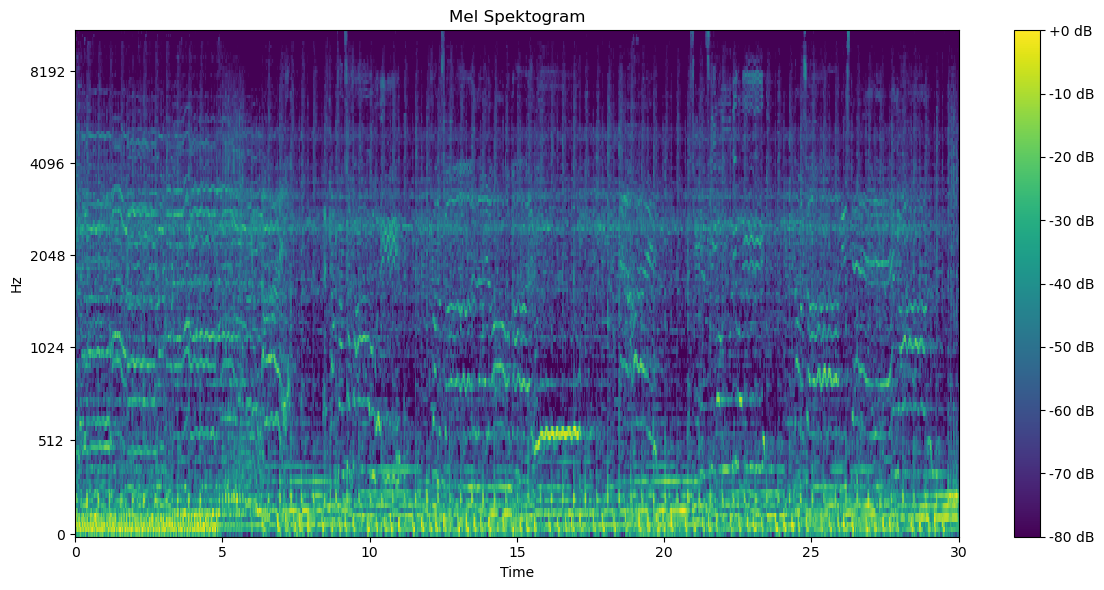

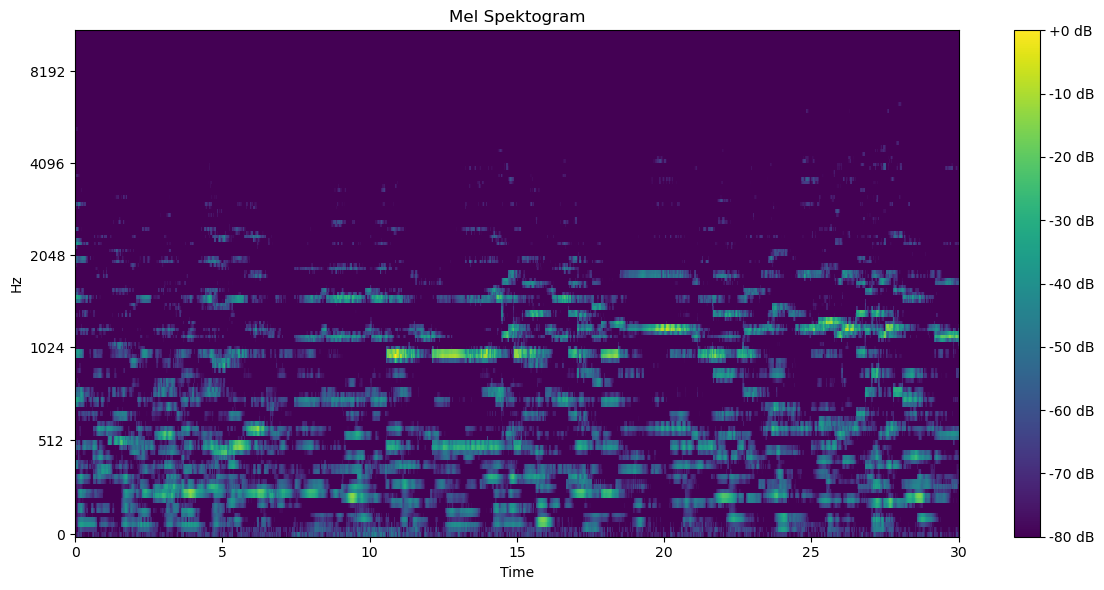

In [66]:
sample_track = os.path.join(path, "metal", "metal.00001.wav")
audio_ex, fs = librosa.load(sample_track)
plot_mel_spectrogram(audio_ex, fs)

sample_track = os.path.join(path, "classical", "classical.00001.wav")
audio_ex, fs = librosa.load(sample_track)
plot_mel_spectrogram(audio_ex, fs)

## Feature Extraction Aşaması

In [6]:
def extract_mfccs(directory_path, fs=22500, duration=30, n_fft=2048, hop_length=512, n_mfcc=13, num_segments=10, json_name = "data.json"):
    data = {
        "genre_name": [],
        "genre_num": [],
        "mfcc": []  
    }
    
    samples_per_track = fs * duration
    samps_per_segment = int(samples_per_track/num_segments)
    mfccs_per_segment = math.ceil(samps_per_segment/hop_length)
    
    print("MFCC extraction işlemi başladı")
    print("========================")
    for i, (path_current, folder_names, file_names) in enumerate(os.walk(directory_path)):
        print(i)
        print(path_current)
        if path_current is directory_path:
            continue
        
        # Save 
        path_list = path_current.split('/')
        genre_current = path_list[-1]
        for file in file_names: 
            file_path = os.path.join(path_current, file).replace(os.sep, '/')

            try:
                audio, fs = librosa.load(file_path, sr=fs)

                for seg in range(num_segments):

                    start_sample = seg * samps_per_segment
                    end_sample = start_sample + samps_per_segment

                    mfcc = librosa.feature.mfcc(y=audio[start_sample:end_sample], sr=fs, n_fft=n_fft, hop_length=hop_length, n_mfcc=n_mfcc)
                    mfcc = mfcc.T

                    if len(mfcc) == mfccs_per_segment:
                        data["genre_name"].append(genre_current)
                        data["genre_num"].append(i-1)
                        data["mfcc"].append(mfcc.tolist())
            except:
                continue

            print(f"{genre_current.title()} türü için MFCC extract edildi")
    
    with open(os.path.join(path_prefix, "dataset", json_name), "w") as filepath:
        json.dump(data, filepath, indent=4)
    
    return np.array(data["mfcc"]), np.array(data["genre_name"]), np.array(data["genre_num"])


In [7]:
%%time

n_mfcc = 13
n_fft = 2048
hop_length = 512
track_duration = 30

segments = [15, 10, 6, 3, 1]

for segment in segments:
    mfccs, genres, genre_nums = extract_mfccs(path, fs=22500, duration=track_duration, n_fft=n_fft, hop_length=hop_length, n_mfcc=n_mfcc, num_segments=segment, json_name="features_{}_sec.json".format(track_duration/segment))
    print(f"MFCCs: {mfccs.shape}")
    print(f"Toplam segment sayısı: {genres.shape}")



MFCC extraction işlemi başladı
0
/home/efectn/python-music-classification/dataset/genres_original
1
/home/efectn/python-music-classification/dataset/genres_original/blues
Blues türü için MFCC extract edildi
Blues türü için MFCC extract edildi
Blues türü için MFCC extract edildi
Blues türü için MFCC extract edildi
Blues türü için MFCC extract edildi
Blues türü için MFCC extract edildi
Blues türü için MFCC extract edildi
Blues türü için MFCC extract edildi
Blues türü için MFCC extract edildi
Blues türü için MFCC extract edildi
Blues türü için MFCC extract edildi
Blues türü için MFCC extract edildi
Blues türü için MFCC extract edildi
Blues türü için MFCC extract edildi
Blues türü için MFCC extract edildi
Blues türü için MFCC extract edildi
Blues türü için MFCC extract edildi
Blues türü için MFCC extract edildi
Blues türü için MFCC extract edildi
Blues türü için MFCC extract edildi
Blues türü için MFCC extract edildi
Blues türü için MFCC extract edildi
Blues türü için MFCC extract edildi
B

/tmp/ipykernel_155888/3495978817.py:27: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, fs = librosa.load(file_path, sr=fs)
/home/efectn/anaconda3/envs/my-conda-env2/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC 

/tmp/ipykernel_155888/3495978817.py:27: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, fs = librosa.load(file_path, sr=fs)
/home/efectn/anaconda3/envs/my-conda-env2/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC 

/tmp/ipykernel_155888/3495978817.py:27: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, fs = librosa.load(file_path, sr=fs)
/home/efectn/anaconda3/envs/my-conda-env2/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC 

/tmp/ipykernel_155888/3495978817.py:27: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, fs = librosa.load(file_path, sr=fs)
/home/efectn/anaconda3/envs/my-conda-env2/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC 

/tmp/ipykernel_155888/3495978817.py:27: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, fs = librosa.load(file_path, sr=fs)
/home/efectn/anaconda3/envs/my-conda-env2/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC extract edildi
Jazz türü için MFCC 